In [1]:
import pullMacroLabelThumb_Images as pmti
import requests
from os.path import join as oj
import os
from IPython.display import Image
reload(pmti)  ### 

<module 'pullMacroLabelThumb_Images' from 'pullMacroLabelThumb_Images.pyc'>

In [2]:
BaseURL = 'http://candygram.neurology.emory.edu:8080/api/v1/'

localImageCacheDir =  oj( os.getcwd(), "cacheDir")
print localImageCacheDir
url_FoxTopLevel_Folders = 'http://candygram.neurology.emory.edu:8080/api/v1/folder?parentType=collection&parentId=595d08b392ca9a000d0748df&limit=50&sort=lowerName&sortdir=1'
#ImageURL = "http://candygram.neurology.emory.edu:8080/api/v1/item/595b7b4292ca9a000d071697/tiles/images/";
#ImageBaseURL = "http://candygram.neurology.emory.edu:8080/api/v1/item/";
  

/home/dolu/Documents/Projects/OCR2QR/PullThumbNails/cacheDir


http://candygram.neurology.emory.edu:8080/api/v1/item/595b7b4292ca9a000d071697/tiles/images/label       

In [4]:
MyImgData = requests.request("GET","http://candygram.neurology.emory.edu:8080/api/v1/item/595d0e0492ca9a000dd570f6/tiles/images/label?height=512")

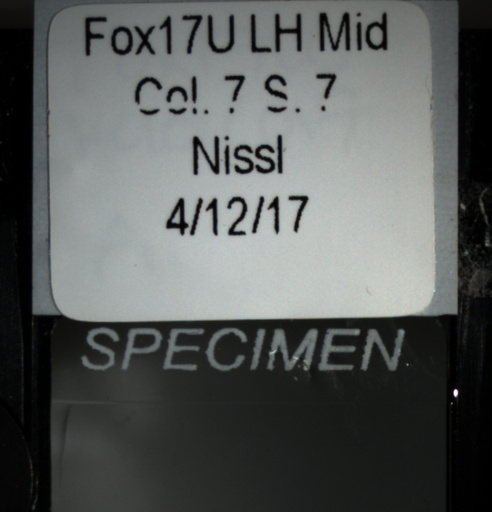

In [5]:
Image(MyImgData.content)

In [6]:
def GetThumbnail( imageID, localCacheDir, slideName, folderName, thumbnailHeight=512 ):
    """This will download a thumbnail for a given imageID and put it somewhere
    The slide basename is the name of the slide.."""
    targetThumbNailPath = oj( localCacheDir, folderName)
    
    if not os.path.isdir( targetThumbNailPath):
        os.makedirs(targetThumbNailPath)
    
    thumbFileName = slideName + ".thumb.labelImage.%d.jpg" % thumbnailHeight
    
    
    imgFileWPath = oj( targetThumbNailPath, thumbFileName)
    
    if not os.path.isfile( imgFileWPath ):
        
        ## We don't have the thumbnail.. so get it
        currentImageURL = "%sitem/%s/tiles/images/label?height=%d" % (BaseURL, imageID, thumbnailHeight) 

        ImgData = requests.request("GET",currentImageURL)
        with open(imgFileWPath,"w") as fp:
            fp.write(ImgData.content)
    
    
    #currentImageURL = ImageBaseURL + DataForCurrentRow._id + "/tiles/images/label?height=" + thumbHeight
     

In [7]:
MyFolderSet = requests.request("GET",url_FoxTopLevel_Folders).json()
for mfs in MyFolderSet:
    ## Iterate through the top level folders and get some thumbnails....

    ItemsInFolder = pmti.ListItemsInGirderFolder( mfs['_id'])
    print " %d items are in the %s folder" % (len(ItemsInFolder), mfs['name'])
    
    
    for iif in ItemsInFolder:
        folderName = mfs['name']
        thumbHeight = 512
        slideName = iif['name']
        GetThumbnail( iif['_id'], localImageCacheDir, slideName, folderName )
        


 53 items are in the 2017-05-12 folder
 6 items are in the 2017-05-13 folder
 105 items are in the 2017-05-15 folder
 45 items are in the 2017-06-15 folder
 59 items are in the 2017-06-16 folder
 88 items are in the 2017-06-19 folder
 70 items are in the 2017-06-20 folder
 1 items are in the 2017-06-21 folder
 25 items are in the 2017-06-22 folder
 390 items are in the 2017-06-23 folder
 166 items are in the 2017-06-24 folder
 0 items are in the TEST_UPLOAD folder
